### 1.0 | Assignment 3: Unsupervised Learning and PCA

### Overview:

Kaggle User Name: DavidGrashof
<br>
Submission (Non-PCA) Score: .9075
<br>
Submission (PCA) Score: .9075
<br>
Submission (Combo PCA) Score: .9075
<br>
<br>
This assignment followed much the same pattern as previous machine learning model exercises. A dataset was provided with a train and test set with the objective of optimizing the predictive power of a RandomForestClassifier. The added wrinkle was the inclusion of PCA to simplify the training and test data by removing columns of data while still capturing 95% of variance for each row in the dataset. Going into this assignment, my expectation was that the PCA would significantly reduce the amount of time required to fit the model to the data due to the decreased number of columns all while maintaing the same level of accuracy. 

After completing some initial exploratory analysis of the dataset, I fit the training data to a random forest regressor and then applied the model to the test set. The model was fit in 1:18 (m:s) and achieved an accuracy of .9075 when submitted to the Kaggle competition. Next, I applied Principal Component Analysis to the data and retrained the model. The design flaw in this assignment was the instruction to apply principal component analysis to both the training and test data set. By applying to both datasets at once, you are accounting for some of the variance that will be present in the test set and influencing the training set which will be used to fit the model. This practice would be similar to scaling training and test data together or even fitting a model on the test and training set together; it produces biased results that do not translate to a productionalized model. As such, I applied fit_transform to the training data and fit only to the test data. In fitting this model, I was suprised to find that the PCA data (column count from 784 to 320) took significantly longer to fit. This ran contrary to my expectations given the smaller dataset. The results were submitted to the Kaggle competition and achieved the same accuracy score of .9075 showing that nearly half the data could be discarded while still accurately representing the data. 

### 1.1 | Load Modules

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #scale any continuous fields
from sklearn.decomposition import PCA
#################################################
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #to evaluate model performances

import warnings
warnings.filterwarnings("ignore")

### 1.2 | Import Train Data

In [2]:
file = "C:/Users/David/OneDrive/MSDS/MSDS422/Week5/train.csv"
train = pd.read_csv(file,sep = ',')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.3 | Data Pre-Processing

In [3]:
#isolate labels and pixel fields
xtrain = train.ix[:,1:]
ytrain = train.ix[:,0]

xtrain.describe()
#looks like most pixels are just white space and can be reduced

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### 1.4 | EDA

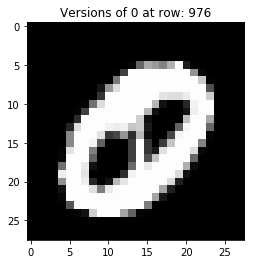

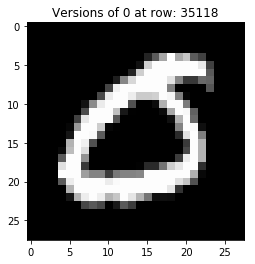

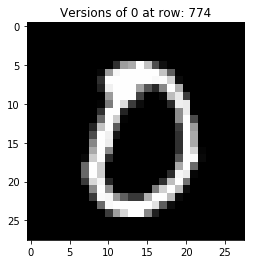

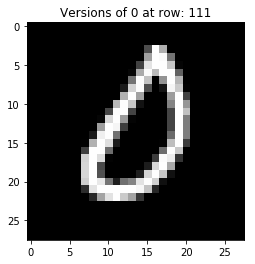

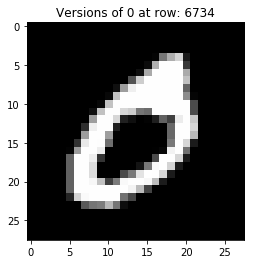

In [5]:
#Examine variances in like numbers. Isolate 5 examples of 0
pltdata = train[train['label']==0].sample(5)

#iterate thru each row in pltdata and display
for index,row in pltdata.iterrows():
    pixels = np.array(xtrain.ix[index,:], dtype='uint8')
    pixels = pixels.reshape((28, 28))
    plt.title('Versions of 0 at row: '+str(index))
    plt.imshow(pixels, cmap='gray')
    plt.show()

Text(0.5, 0, 'Labels')

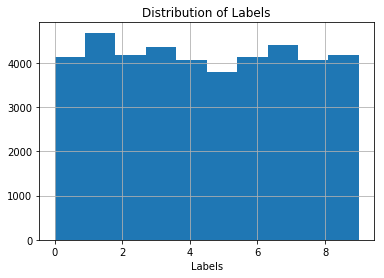

In [7]:
#check for imbalanced dataset
ytrain.hist()
plt.title('Distribution of Labels')
plt.xlabel('Labels')

### 1.5 | Import Test Data

In [8]:
file = "C:/Users/David/OneDrive/MSDS/MSDS422/Week5/test.csv"
xtest = pd.read_csv(file,sep = ',')
xtest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
xtest.describe()
#looks like most pixels are just white space and can be reduced

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [10]:
#confirm split went according to plan. both y values are close to the mean value
print("Row count of Xtrain:",len(xtrain))
print("Row count of Ytrain:",len(ytrain))
print("Row count of Xtest:",len(xtest))

Row count of Xtrain: 42000
Row count of Ytrain: 42000
Row count of Xtest: 28000


### 1.6 | Scale Test and Training Data 

In [11]:
#scale training data separate from test so as to not influence scaling
xtrain = pd.DataFrame(StandardScaler().fit_transform(xtrain),
                   columns = xtrain.columns, index = xtrain.index)


#scale test data likewise
xtest = pd.DataFrame(StandardScaler().fit_transform(xtest),
                   columns = xtest.columns, index = xtest.index)


print("Test Data shape:",xtest.shape)
print("Training Data shape: ",xtrain.shape)
xtrain.head()

Test Data shape: (28000, 784)
Training Data shape:  (42000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.034737,-0.02527,-0.018026,-0.011473,-0.009099,-0.006897,0.0,0.0,0.0,0.0


### 1.7 | Model I: RandomForest Classifier (All Variables)

In [12]:
start=datetime.datetime.now()

model1 = RandomForestClassifier(random_state = 42)

param_grid = [{
    "n_estimators"       :[10],
    "max_features"       :['sqrt'],
    "bootstrap"          :[True],
    "warm_start"         :[True, False],
    }]

#fit parameters to model for best model
grid_search = GridSearchCV(model1,param_grid,cv = 5)
rf = grid_search.fit(xtrain,ytrain)

end=datetime.datetime.now()
print("Elapsed Time: ",end-start)

Elapsed Time:  0:01:18.789869


In [13]:
#make predictions and export submission
best_model_rf = rf.best_estimator_
label = best_model_rf.predict(xtest)
submission = pd.DataFrame({"ImageID":xtest.index,"Label":label})
submission.to_csv('C:/Users/David/OneDrive/MSDS/MSDS422/Week5/submissions/submission1.csv')

Text(0.5, 0, 'Variables')

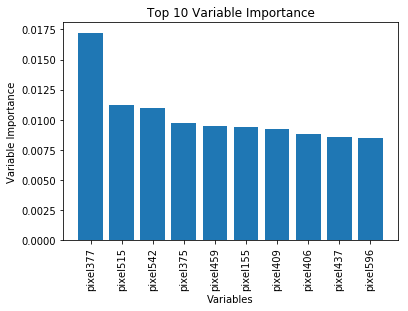

In [14]:
#take a look at top variables of importance
coeff = pd.concat([pd.Series(xtrain.columns),pd.Series(best_model_rf.feature_importances_)],axis = 1)
coeff.columns = ['Variable','Variable Importance']
coeff = coeff.sort_values('Variable Importance',ascending = False).head(10)

plt.bar(coeff['Variable'],coeff['Variable Importance'])
plt.title('Top 10 Variable Importance')
plt.xticks(rotation = 90)
plt.ylabel('Variable Importance')
plt.xlabel('Variables')

### 1.8 | PCA

In [15]:
n_components = []
variable_count = []    
#evaluate variance explained by different numbers of variables
for i in range(50,100,5):
    pca = PCA(n_components = i/100)
    xtrain_pca=pca.fit_transform(xtrain)
    variable_count.append(len(pca.components_))
    n_components.append(i)

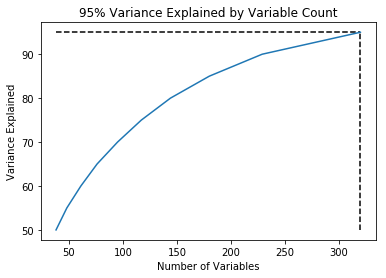

In [16]:
#looks like about half of the variables can explain as much as 95 percent of variance
plt.plot(variable_count,n_components)
plt.title('95% Variance Explained by Variable Count')
plt.xlabel('Number of Variables')
plt.ylabel('Variance Explained')
plt.hlines(y = 95,xmin = min(variable_count),xmax = max(variable_count),linestyles = 'dashed')
plt.vlines(x = max(variable_count),ymin = min(n_components),ymax = max(n_components),linestyles = 'dashed')

### 1.9 | Model II: Random Forest Regressor (PCA)

In [18]:
start=datetime.datetime.now()

model2 = RandomForestClassifier(random_state = 42)

param_grid = [{
    "n_estimators"       :[10],
    "max_features"       :['sqrt'],
    "bootstrap"          :[True],
    "warm_start"         :[True, False],
    }]

#fit parameters to model for best model
grid_search = GridSearchCV(model2,param_grid,cv = 5)
rf = grid_search.fit(pd.DataFrame(xtrain_pca),ytrain)

end=datetime.datetime.now()
print("Elapsed Time: ",end-start)

Elapsed Time:  0:04:20.705715


In [19]:
#make predictions and export submission
best_model_rf_2 = rf.best_estimator_
label_2 = best_model_rf_2.predict(xtest_pca)
submission = pd.DataFrame({"ImageID":xtest.index,"Label":label})
submission.to_csv('C:/Users/David/OneDrive/MSDS/MSDS422/Week5/submissions/submission2.csv')

### 2.0 | Addendum (PCA on combined Training and Test Data)

In [28]:
start=datetime.datetime.now()

#combine test and training 
combo = pd.concat([xtrain,xtest],axis = 0)
pca = PCA(n_components = .95,random_state = 42)
#fit_transform train and test
combo_pca=pca.fit_transform(combo)
xtrain_pca = pca.transform(xtrain)
xtest_pca = pca.transform(xtest)

end=datetime.datetime.now()
print("Elapsed Time: ",end-start)

Elapsed Time:  0:00:13.332147


In [29]:
start=datetime.datetime.now()

model3 = RandomForestClassifier(random_state = 42)

param_grid = [{
    "n_estimators"       :[10],
    "max_features"       :['sqrt'],
    "bootstrap"          :[True],
    "warm_start"         :[True, False],
    }]

#fit parameters to model for best model
grid_search = GridSearchCV(model2,param_grid,cv = 5)
rf = grid_search.fit(pd.DataFrame(xtrain_pca),ytrain)

end=datetime.datetime.now()
print("Elapsed Time: ",end-start)

Elapsed Time:  0:03:59.517650


In [31]:
#make predictions and export submission
best_model_rf_3 = rf.best_estimator_
label_3 = best_model_rf_3.predict(xtest_pca)
submission = pd.DataFrame({"ImageID":xtest.index,"Label":label})
submission.to_csv('C:/Users/David/OneDrive/MSDS/MSDS422/Week5/submissions/submission3.csv')